### DataAnalyzer for feature analysis
The class `DataAnalyzer` is derived from `AutoExplainerBase` for data analysis and exploration, e.g., feature correlation analysis, feature imbalance analysis and feature selection.

In [ ]:
import sys
import os

module_path = os.path.abspath('E:/Codes/OmniXAI/')
if module_path not in sys.path:
    sys.path.append(module_path)

# For Jupyter notebooks or interactive environments where __file__ is not defined
try:
    # Try to use __file__ if available
    directory = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # If __file__ is not defined (e.g., in Jupyter), use the current working directory
    directory = os.path.abspath('')
    
sys.path.append(os.path.dirname(directory))

In [9]:
# This default renderer is used for sphinx docs only. Please delete this cell in IPython.
import plotly.io as pio
pio.renderers.default = "png"

In [11]:
import os
import numpy as np
from omnixai.data.tabular import Tabular
from omnixai.explainers.data import DataAnalyzer
from omnixai.visualization.dashboard import Dashboard

The dataset to analyze should be an instance of `Tabular` constructed from a pandas dataframe or a numpy array. The dataset used in this example is for income prediction (https://archive.ics.uci.edu/ml/datasets/adult). We load the raw data from a dumped numpy array and then construct an instance of `Tabular` by specifying the raw data, the feature names, the categorical feature names and the target/label column. If there are no categorical features or target/label column, these two parameters are set to None.

In [12]:
# Load the dataset to analyze
data = np.genfromtxt(os.path.join('data', 'adult.data'), delimiter=', ', dtype=str)
# The column names for this dataset
feature_names = [
    "Age", "Workclass", "fnlwgt", "Education",
    "Education-Num", "Marital Status", "Occupation",
    "Relationship", "Race", "Sex", "Capital Gain",
    "Capital Loss", "Hours per week", "Country", "label"
]
# Construct a `Tabular` instance for this tabular dataset, 
# e.g., specifying feature columns, categorical feature names and target column name.
tabular_data = Tabular(
    data,
    feature_columns=feature_names,
    categorical_columns=[feature_names[i] for i in [1, 3, 5, 6, 7, 8, 9, 13]],
    target_column='label'
)

We now create an explainer called `DataAnalyzer` for data analysis. The parameter `explainers` in `DataAnalyzer` indicates the names of the analyzers we want to apply, e.g., "correlation" is for feature correlation analysis, "imbalance" is for feature imbalance analysis. If an analyzer is applied more than once, "#n" (n is an integer) is appended to the analyzer name, e.g., "imbalance" is applied four times with different parameters.

Data analysis is categorized as "global explanation" in the library. To generate explanations, `explain_global` is called with the additional parameters for the selected analyzers. For example, "imbalance#0" analyzes the feature "Sex", "imbalance#3" analyzes the cross-feature "Marital Status, Age".

Correlation:


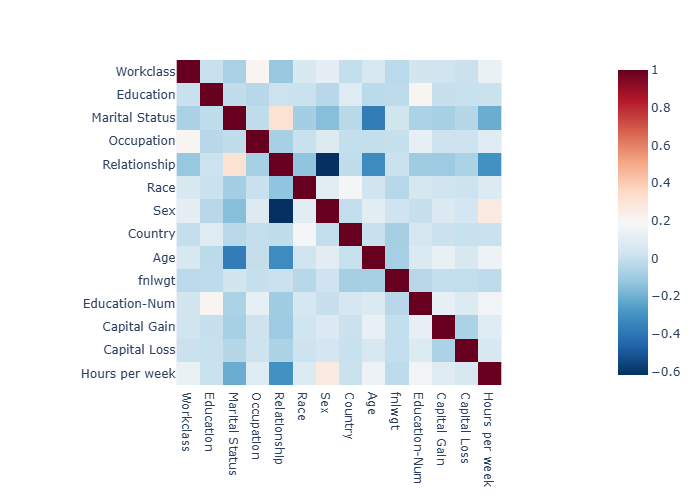

Imbalance#0:


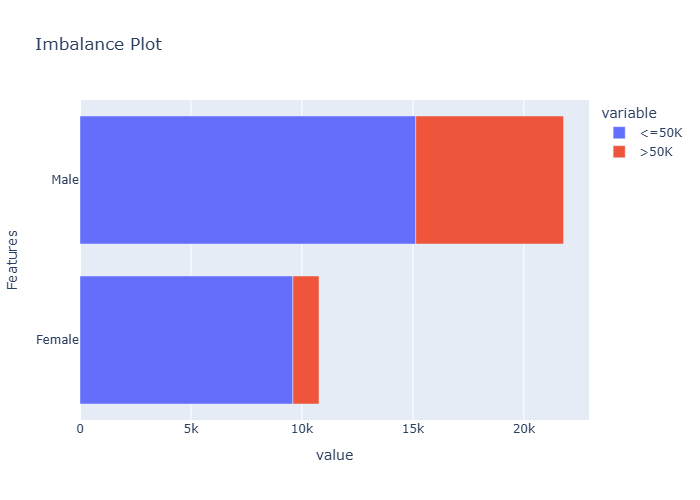

Imbalance#4:


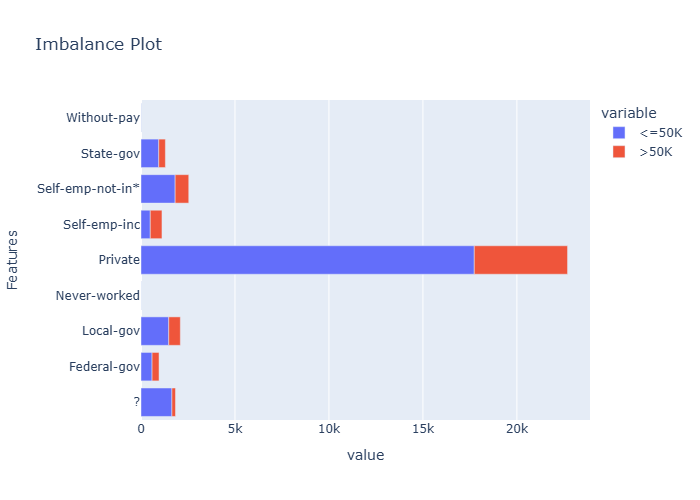

Mutual information:


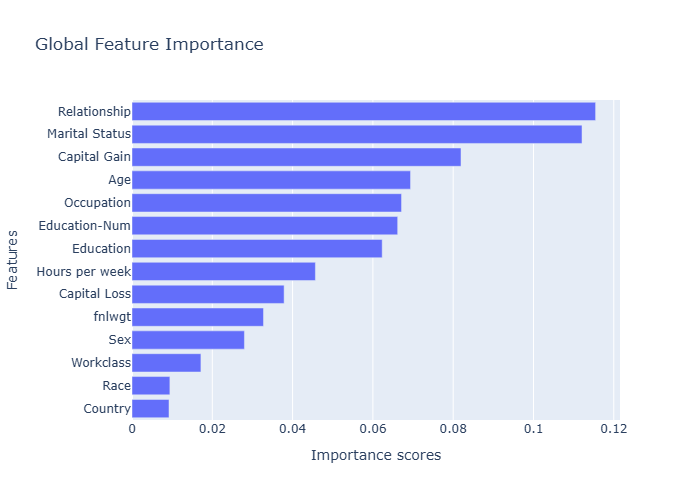

Chi square:


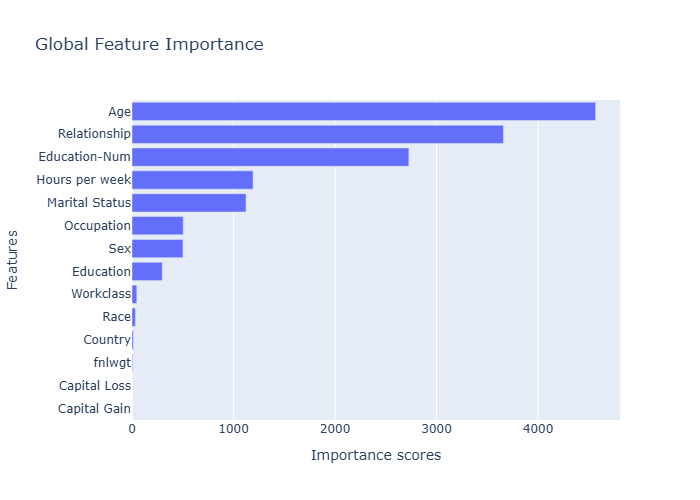

In [13]:
# Initialize a `DataAnalyzer` explainer.
# We can choose multiple explainers/analyzers by specifying analyzer names. 
# In this example, the first explainer is for feature correlation analysis and 
# the last two explainers are for feature selection and
# the others are for feature imbalance analysis (the same explainer with different parameters).
explainer = DataAnalyzer(
    explainers=["correlation", "imbalance#0", "imbalance#1", "imbalance#2", "imbalance#3", "imbalance#4", "mutual", "chi2"],
    mode="classification",
    data=tabular_data
)
# Generate explanations by calling `explain_global`.
explanations = explainer.explain_global(
    params={"imbalance#0": {"features": ["Sex"]},
            "imbalance#1": {"features": ["Race"]},
            "imbalance#2": {"features": ["Sex", "Race"]},
            "imbalance#3": {"features": ["Marital Status", "Age"]},
            "imbalance#4": {"features": ["Workclass"]}}
)

print("Correlation:")
explanations["correlation"].ipython_plot()
print("Imbalance#0:")
explanations["imbalance#0"].ipython_plot()
print("Imbalance#4:")
explanations["imbalance#4"].ipython_plot()
print("Mutual information:")
explanations["mutual"].ipython_plot()
print("Chi square:")
explanations["chi2"].ipython_plot()

Given the generated explanations, we can launch a dashboard (a Dash app) for visualization. Because the explanations in this example are "global explanations", `global_explanations` is set for `Dashboard`.

In [ ]:
# Launch a dashboard for visualization.
dashboard = Dashboard(global_explanations=explanations)
dashboard.show()